# Phase 2 - Readmission Prediction

## Data
The dataset contains data from the US Health Facts Database, which comprised  de-identified diabetes patients between 1999 and 2008

Features and their types
Encounter ID: Numeric
* Patient number: Numeric
* Race: Nominal
* Gender: Nominal
* Age: Nominal
* Weight: Numeric
* Admission Type: Nominal
* Discharge disposition: Nominal
* Admission source: Nominal
* Time in hospital: Numeric
* Payer code: Nominal
* Medical specialty: Nominal
* Number of lab procedures: Numeric
* Number of procedures
* Number of medications: Numeric
* Number of outpatient visits: Numeric
* Number of emergency visits: Numeric
* Number of inpatient visits: Numeric
* Diagnosis 1: Nominal
* Diagnosis 2: Nominal
* Diagnosis 3: Nominal
* Number of diagnoses: Numeric
* Glucose serum test result: Nominal
* A1c test result: Nominal
* Change of medications: Nominal

* 24 features for medications (metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone): Nominal

* Diabetes medications: Nominal
* Readmitted: Nominal

For more details about the features click:
https://www.hindawi.com/journals/bmri/2014/781670/tab1/

The classification target in this problem is the variable "readmitted"

in the dataset, it consists of 3 factors:
* "NO": for no record of readmission
* ">30": if the patient was readmitted in more than 30 days
* "<30": if the patient was readmitted in less than 30 days


We are interested in predicting if a patient should be readmitted in less than 30 days.

# Outline

1. Data Preprocessing
2. Data Exploratory Analysis
3. Feature Selection
4. Modeling
5. Conclusion and feature work suggestions

# Data Preprocessing 

Import the necessary packages

In [ ]:
library(ggplot2)
library(tidyverse)
library(pROC)
library(caTools)
library(caret)
library(dplyr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1       v purrr   0.3.2  
v tidyr   0.8.3       v dplyr   0.8.0.1
v readr   1.3.1       v stringr 1.4.0  
v tibble  2.1.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift



### Let's take a look at our data 

In [ ]:
df <- read.csv("diabetic_data.csv", head=TRUE)

In [ ]:
df

encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Let's looks at the columns and of our dataset and their data types

In [ ]:
str(df)

'data.frame':	101766 obs. of  50 variables:
 $ encounter_id            : int  2278392 149190 64410 500364 16680 35754 55842 63768 12522 15738 ...
 $ patient_nbr             : int  8222157 55629189 86047875 82442376 42519267 82637451 84259809 114882984 48330783 63555939 ...
 $ race                    : Factor w/ 6 levels "?","AfricanAmerican",..: 4 4 2 4 4 4 4 4 4 4 ...
 $ gender                  : Factor w/ 3 levels "Female","Male",..: 1 1 1 2 2 2 2 2 1 1 ...
 $ age                     : Factor w/ 10 levels "[0-10)","[10-20)",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ weight                  : Factor w/ 10 levels "?","[0-25)","[100-125)",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ admission_type_id       : int  6 1 1 1 1 2 3 1 2 3 ...
 $ discharge_disposition_id: int  25 1 1 1 1 1 1 1 1 3 ...
 $ admission_source_id     : int  1 7 7 7 7 2 2 7 4 4 ...
 $ time_in_hospital        : int  1 3 2 2 1 3 4 5 13 12 ...
 $ payer_code              : Factor w/ 18 levels "?","BC","CH",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ medical_

We can note that we have columns that do not contrubute to the classification of readmitted and non-readmitted patients like "payer_code" and "admission_type_id", hence we will remove these 

In [ ]:
df <- select(df,-c(encounter_id, patient_nbr, number_outpatient, number_emergency, 
                   number_inpatient, weight, payer_code, admission_type_id, discharge_disposition_id,
            admission_source_id, medical_specialty, time_in_hospital))

In [ ]:
names(df)

[1] "race"                     "gender"                  
 [3] "age"                      "num_lab_procedures"      
 [5] "num_procedures"           "num_medications"         
 [7] "diag_1"                   "diag_2"                  
 [9] "diag_3"                   "number_diagnoses"        
[11] "max_glu_serum"            "A1Cresult"               
[13] "metformin"                "repaglinide"             
[15] "nateglinide"              "chlorpropamide"          
[17] "glimepiride"              "acetohexamide"           
[19] "glipizide"                "glyburide"               
[21] "tolbutamide"              "pioglitazone"            
[23] "rosiglitazone"            "acarbose"                
[25] "miglitol"                 "troglitazone"            
[27] "tolazamide"               "examide"                 
[29] "citoglipton"              "insulin"                 
[31] "glyburide.metformin"      "glipizide.metformin"     
[33] "glimepiride.pioglitazone" "metformin.rosiglitazone" 
[35] "metformin.pioglitazone"   "change"                  
[37] "diabetesMed"              "readmitted"

# Research Hypothesis 

* Can we determine if a patient should be readmitted in less than 30 days?
* What are the most significant factors that can tell if a patient should be readmitted in less than 30 days?

## Data Manipulation

According to our hypothesis formulation, a patient should be readmitted ( readmitted = 1) if they were readmitted less than 30 days (readmitted == "<30"), 

else (readmitted =0) if they were readmitted in more than 30 days or never readmitted. (readmitted == ">30") or (readmitted == "NO")

In [ ]:
df$readmitted <- as.character(df$readmitted)

In [ ]:
df$readmitted[df$readmitted == ">30"] <- 0
df$readmitted[df$readmitted == "NO"] <- 0
df$readmitted[df$readmitted == "<30"] <- 1

In [ ]:
#convert readmitted variable to factor again
df$readmitted <- as.factor(df$readmitted)

In [ ]:
# checking for more missing values
missing <- which(df == "?", arr.ind = TRUE)

In [ ]:
dim(missing)

[1] 2273    2

In [ ]:
unique(missing[,2])

[1] 1

we notice that the variables "race" has 2273 missing values out of 101766

since these missing values represent approx. 2% out of te entire dataset, we choose to remove the observations with these missing values

In [ ]:
df <- subset(df, race!= "?")
df$race <- droplevels(df$race)

In [ ]:
rownames(df) <- 1:nrow(df)

Let's check our qualitative variables

In [ ]:
#it seems that some values have only one level, hence we drop these columns from our model
levels <- as.data.frame(sapply(lapply(df, unique), length))

In [ ]:
levels

,"sapply(lapply(df, unique), length)"
race,5
gender,3
age,10
num_lab_procedures,118
num_procedures,7
num_medications,75
diag_1,8
diag_2,8
diag_3,8
number_diagnoses,16


we notice that some qualitative variables have only one value, we can eliminate them from our model

In [ ]:
df <- select(df,-c(examide, citoglipton, metformin.rosiglitazone))

In [ ]:
#library to get a good description of our data
library(Hmisc)

Loading required package: survival

Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

Loading required package: Formula

Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units



In [ ]:
describe(df$readmitted)

df$readmitted 
       n  missing distinct 
   99493        0        2 
                      
Value          0     1
Frequency  88324 11169
Proportion 0.888 0.112

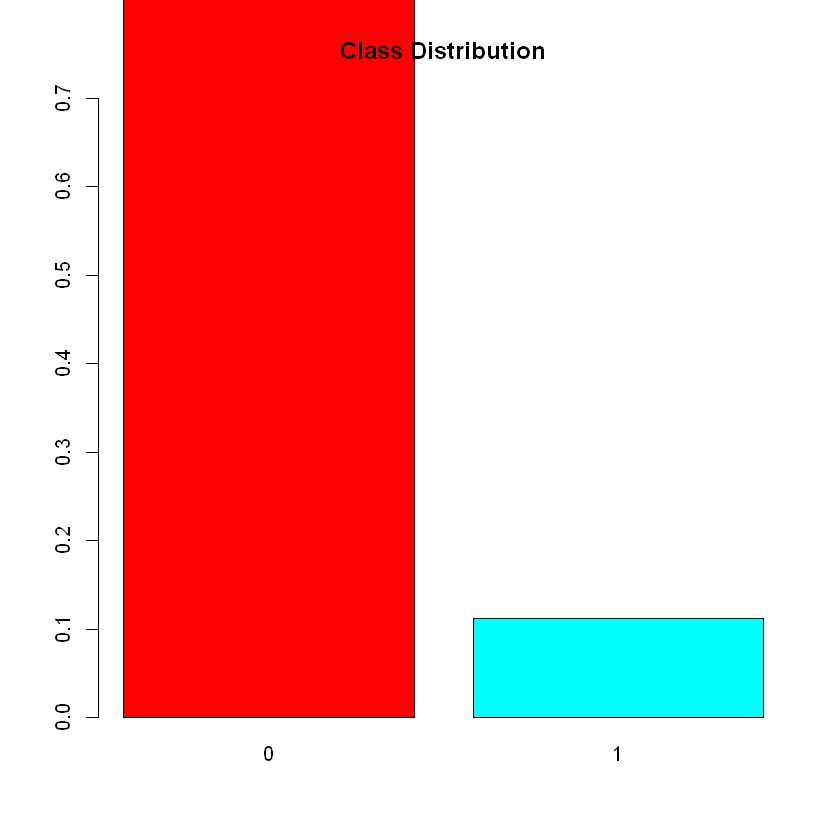

In [ ]:
barplot(prop.table(table(df$readmitted)),
        col = rainbow(2),
        ylim = c(0, 0.7),
        main = "Class Distribution")

we notice that we have 88.8% non readmitted patients and only 11.2% readmitted

## Sampling techniques

Since we have unbalanced data, using this data for prediction without fixing the issues for unbalance will result in bias towards the most common class (in our case '0' i.e not readmitted)

in this case, we will try two sampling techniques:
*  Undersampling
*  Oversampling
*  Both (Under and over)

otherwise known as downsampling and upsampling

### train-test-split

In [ ]:
# we split our data into 80% training and 20% testing
#If there are only a few labels (as is expected) than relative ratio of data in both subsets will be the same.
set.seed(123)
mask <- sample.split(df$readmitted, SplitRatio = .80)
train <- subset(df, mask=TRUE)
test <- subset(df, mask =FALSE)

## Undersampling

we will downsample the majority class to have approx balanced data classes

In [ ]:
library(ROSE)

Loaded ROSE 0.0-3



In [ ]:
#we want our data to be 60:40 proportionate
under <- ovun.sample(readmitted~., data=train, method = "under", p=0.4)$data
under= under[sample(1:nrow(under)), ]
table(under$readmitted)


    0     1 
16669 11169 

In [ ]:
describe(under$readmitted)

under$readmitted 
       n  missing distinct 
   27838        0        2 
                      
Value          0     1
Frequency  16669 11169
Proportion 0.599 0.401

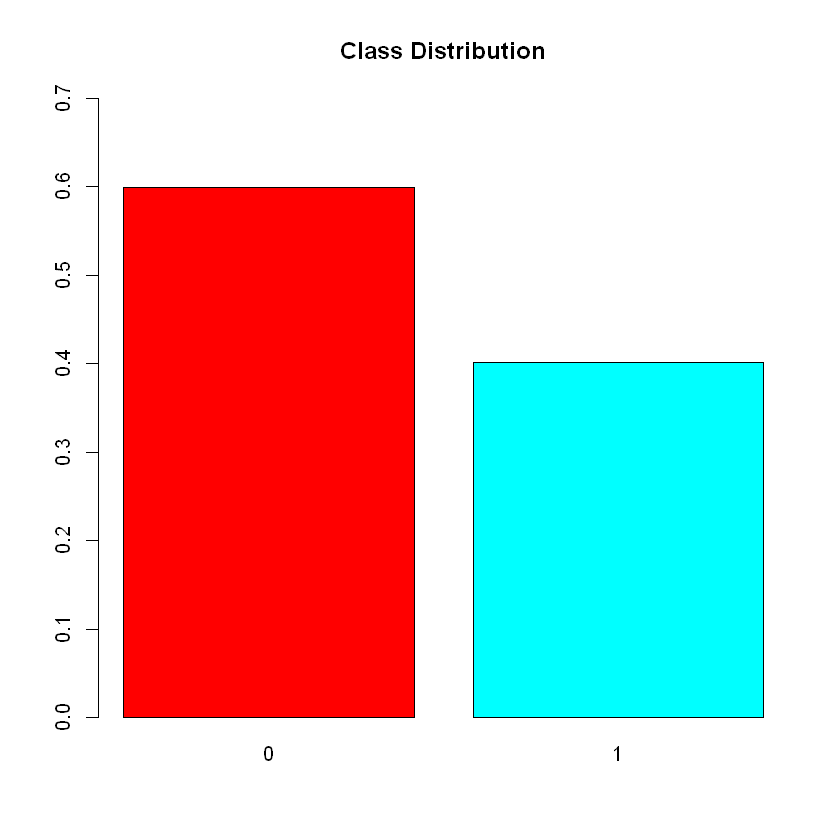

In [ ]:
barplot(prop.table(table(under$readmitted)),
        col = rainbow(2),
        ylim = c(0, 0.7),
        main = "Class Distribution")

## Oversampling

In [ ]:
#we want our data to be 60:40 proportionate
over <- ovun.sample(readmitted~., data=train, method = "over", p=0.4)$data
#shuffling the data
over= over[sample(1:nrow(over)), ]
table(over$readmitted)


    0     1 
88324 58882 

In [ ]:
describe(over$readmitted)

over$readmitted 
       n  missing distinct 
  147206        0        2 
                      
Value          0     1
Frequency  88324 58882
Proportion   0.6   0.4

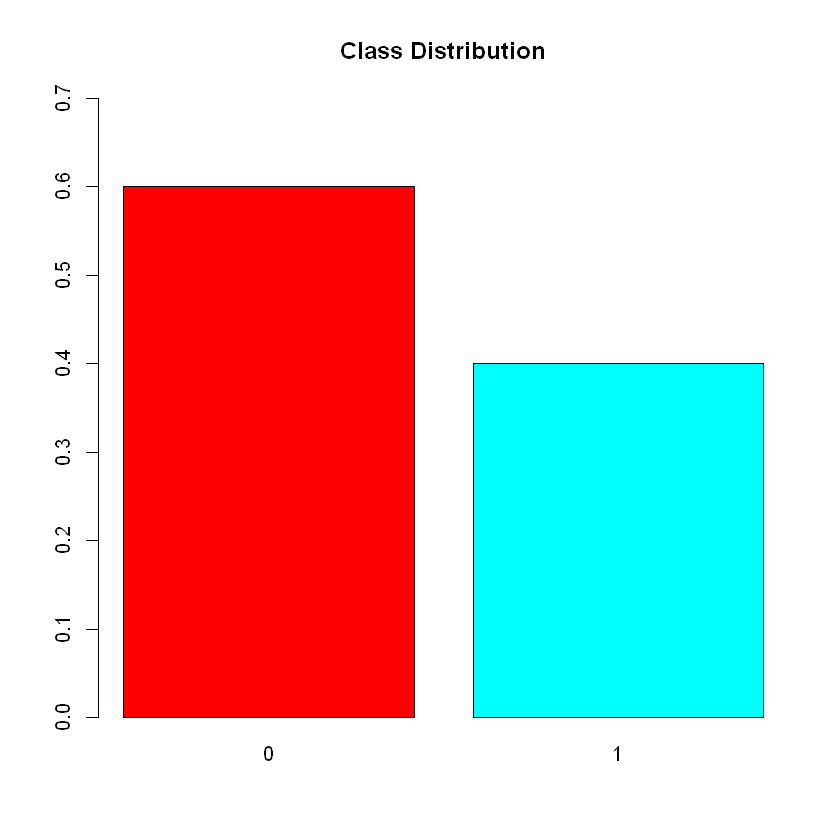

In [ ]:
barplot(prop.table(table(over$readmitted)),
        col = rainbow(2),
        ylim = c(0, 0.7),
        main = "Class Distribution")

## Both (Over & Under)

In [ ]:
#we want our data to be 60:40 proportionate
both <- ovun.sample(readmitted~., data=train, method = "both", p=0.4)$data
both= both[sample(1:nrow(both)), ]
table(both$readmitted)


    0     1 
59831 39662 

In [ ]:
describe(both$readmitted)

both$readmitted 
       n  missing distinct 
   99493        0        2 
                      
Value          0     1
Frequency  59831 39662
Proportion 0.601 0.399

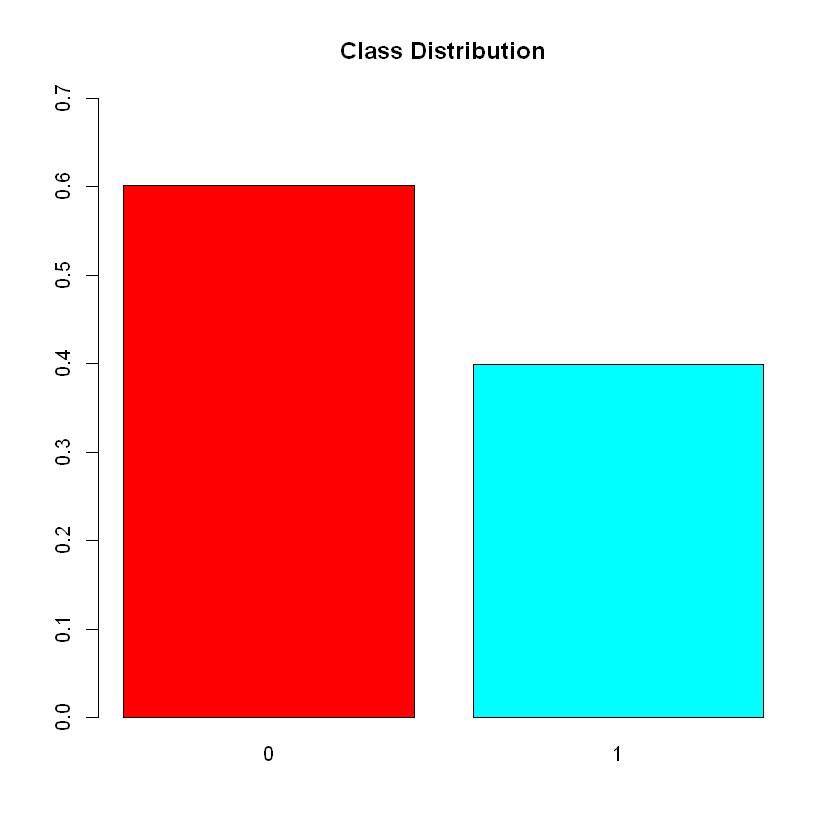

In [ ]:
barplot(prop.table(table(both$readmitted)),
        col = rainbow(2),
        ylim = c(0, 0.7),
        main = "Class Distribution")

# Data Exploratory Analysis

Let's check if our new datasets meet the requirements of the original dataset.

#### Qualitative Values Match

We shoud check if the datasets contain all levels of each qualitative predictor.

e.g: for qualitative predictor "tolbutamide" that has two levels, we need to make sure our dataset contains obersvations with both levels

In [ ]:
full.levels <- as.data.frame(sapply(lapply(df, unique), length))
train.levels <- as.data.frame(sapply(lapply(train, unique), length))
over.levels <- as.data.frame(sapply(lapply(over, unique), length))
under.levels <- as.data.frame(sapply(lapply(under, unique), length))
both.levels <- as.data.frame(sapply(lapply(both, unique), length))

In [ ]:
nr <- nrow(full.levels)
comb <- cbind(full.levels[1:nr, ], train.levels[1:nr, ], over.levels[1:nr, ], under.levels[1:nr, ], both.levels[1:nr, ] )

In [ ]:
comb

5,5,5,5,5
3,3,3,2,2
10,10,10,10,10
118,118,118,110,115
7,7,7,7,7
75,75,75,72,73
8,8,8,8,8
8,8,8,8,8
8,8,8,8,8
16,16,16,16,16
4,4,4,4,4


In [ ]:
full.levels

,"sapply(lapply(df, unique), length)"
race,5
gender,3
age,10
num_lab_procedures,118
num_procedures,7
num_medications,75
diag_1,8
diag_2,8
diag_3,8
number_diagnoses,16


We notice that the datasets *under* and *both* have missing levels for the following predictor:
* metformin.pioglitazone
* glimepiride.pioglitazone
* gender
* chlorpropamide
* acetohexamide
* tolazamide

Hence, we will only use the *over* dataset as our traning data

In the next step, we are going to check collinearity between the variables.

Notice that we have both qualitative and quantitave variables, which renders the cor() and rcorr() functions unuseful for our purpose. To solve this problem, we use the package "x2y.R" (not implemented in R yet) that contains the function dx2y which calculated the correlation between the indepent variables.
This package was designed by Dr. Rama Ramakrishnan, a Professor of the Practice at MIT Sloan School of Management where he teaches courses in Data Science, Optimization and applied Machine Learning.

More details are in this article: https://rviews.rstudio.com/2021/04/15/an-alternative-to-the-correlation-coefficient-that-works-for-numeric-and-categorical-variables/

In [ ]:
source("x2y.R")

Loading required package: rpart


In [ ]:
correlation <- dx2y(over)
correlation[correlation$x2y >20, ]

x,y,perc_of_obs,x2y
insulin,change,100,52.57
diabetesMed,change,100,34.12
metformin,change,100,23.12


Notice that the qualitative variable "change" is highly collinear with insulin, diabetesMed, and metformin.

To avoid thsi problem, we will remove the variable "change" from our data

In [ ]:
over <- select(over, -change)

In [ ]:
test <- select(test, -change)

In [ ]:
#let's check for high collinearity again
correlation <- dx2y(over)
correlation[correlation$x2y >20, ]

x,y,perc_of_obs,x2y


We notice that we do not have any multicollinearity anymore.

Let's explore some attributes and their distribution

In [ ]:
racetable <- as.data.frame(table(over$race))

In [ ]:
racetable <- racetable[-1,]

In [ ]:
racetable

,Var1,Freq
2,Asian,921
3,Caucasian,112830
4,Hispanic,2925
5,Other,2149


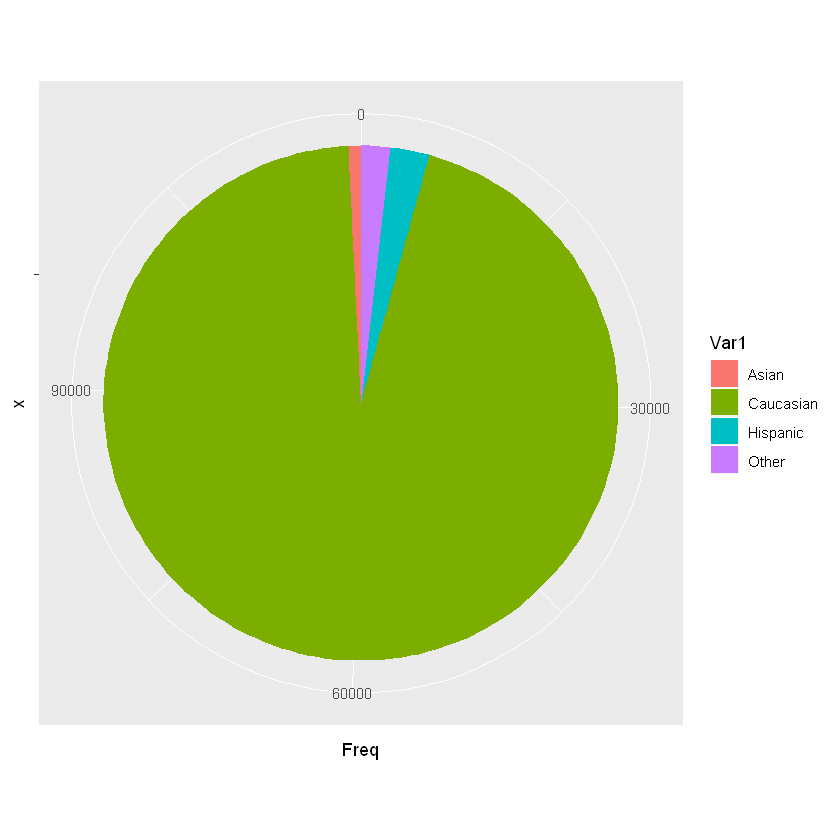

In [ ]:
ggplot(racetable, aes(x="", y=Freq, fill=Var1)) +
  geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0)

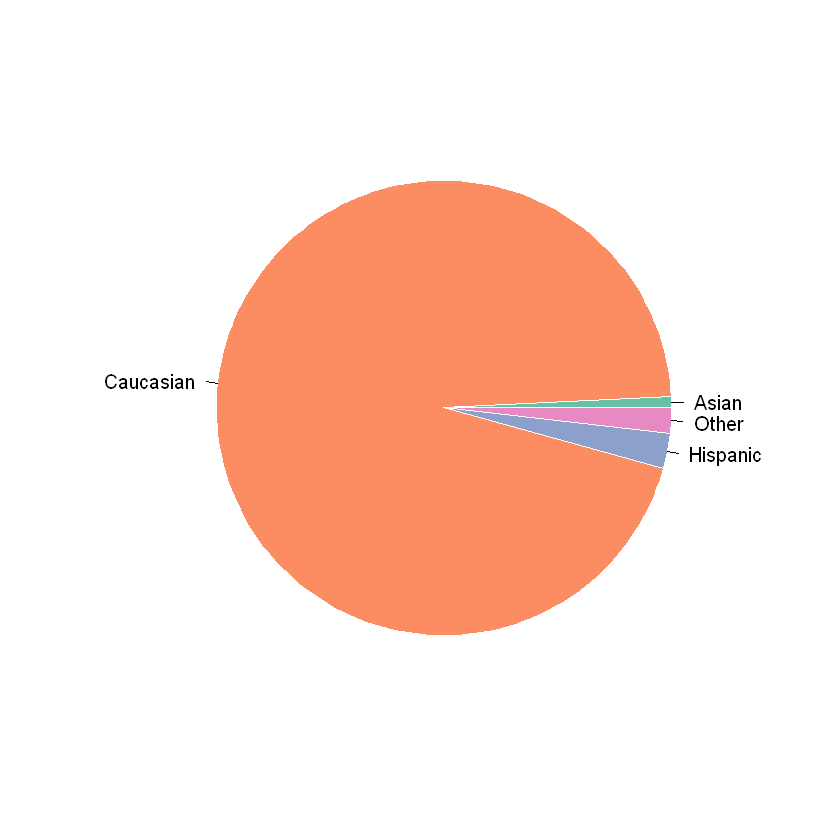

In [ ]:
# Prepare a color palette. Here with R color brewer:
library(RColorBrewer)
myPalette <- brewer.pal(5, "Set2") 

# You can change the border of each area with the classical parameters:
pie(racetable$Freq , labels =racetable$Var1 , border="white", col=myPalette )

We can see that most of our patients are caucasian, then African American then we have other race identities with fewer values

Now let's explore the age ranges that we have and their presence in the dataset

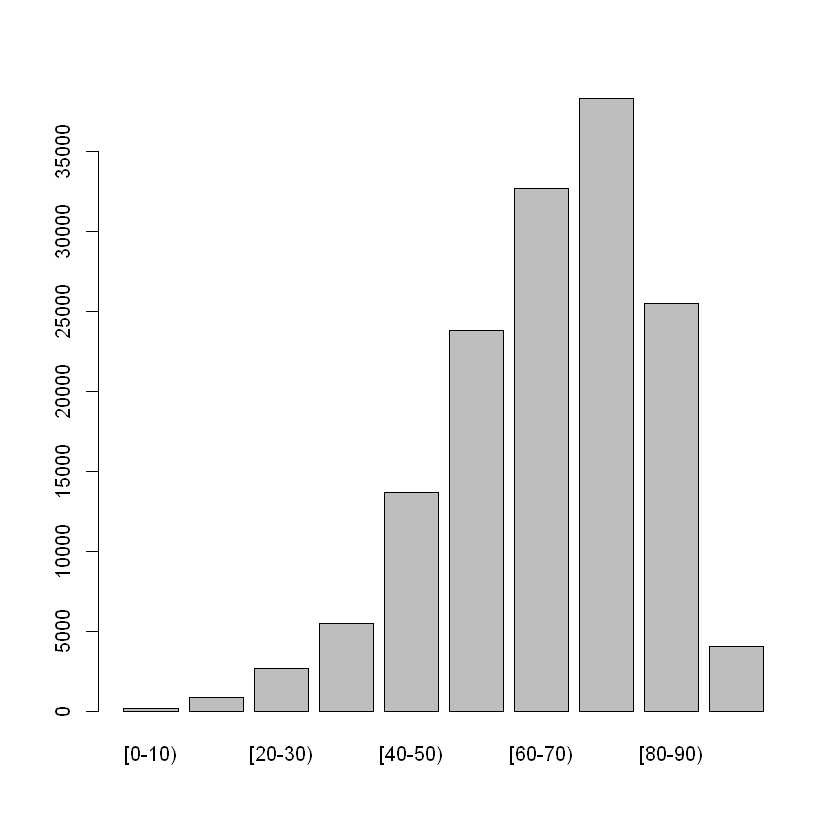

In [ ]:
plot(over$age)

we can see that most of our patients are old, most of them ranging between 50-90

# Feature Selection

Scaling the numeric predictors

In [ ]:
over[,c(4,5,6, 10)] = scale(over[,c(4,5,6, 10)])
test[,c(4,5,6, 10)] = scale(test[,c(4,5,6, 10)])

## Subset Selection Methods

### Best Subset Selection

In [ ]:
library(leaps)
regfit.full <- regsubsets(readmitted∼., data = over, nvmax=19)
summary(regfit.full)

ERROR: Error in leaps.exhaustive(a, really.big): Exhaustive search will be S L O W, must specify really.big=T


We get an error that it will be too slow

Let's try a different method

### Forward Stepwise Selection

In [ ]:
regfit.fwd <- regsubsets(readmitted∼., data = over, nvmax = 20,method="forward")
fwd.sum <- summary(regfit.fwd)

It's not easy to read, hence, we will print the values for Cp, AIC, BIC, and adjusted R2

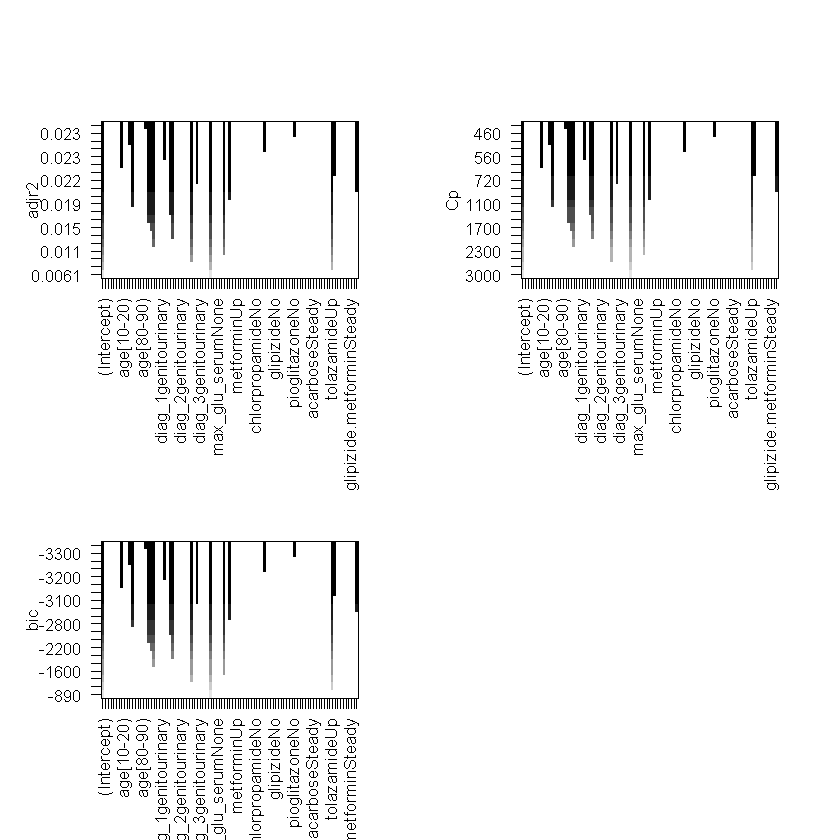

In [ ]:
par(mfrow =c(2,2))
plot(regfit.fwd ,scale ="adjr2")
plot(regfit.fwd ,scale ="Cp")
plot(regfit.fwd,scale ="bic")

In [ ]:
print(which.max(fwd.sum$adjr2))
print(which.min(fwd.sum$cp))
print(which.min(fwd.sum$bic))

[1] 20
[1] 20
[1] 20


In [ ]:
max(fwd.sum$adjr2)

[1] 0.02355821

Even though this is the best model, the adjusted R2 is still very low

Let's try a different method for selecting the best features

### Backward stepwise selection

In [ ]:
regfit.bwd <- regsubsets(readmitted∼., data = over, nvmax = 20,method="backward")
bwd.sum <- summary(regfit.bwd)

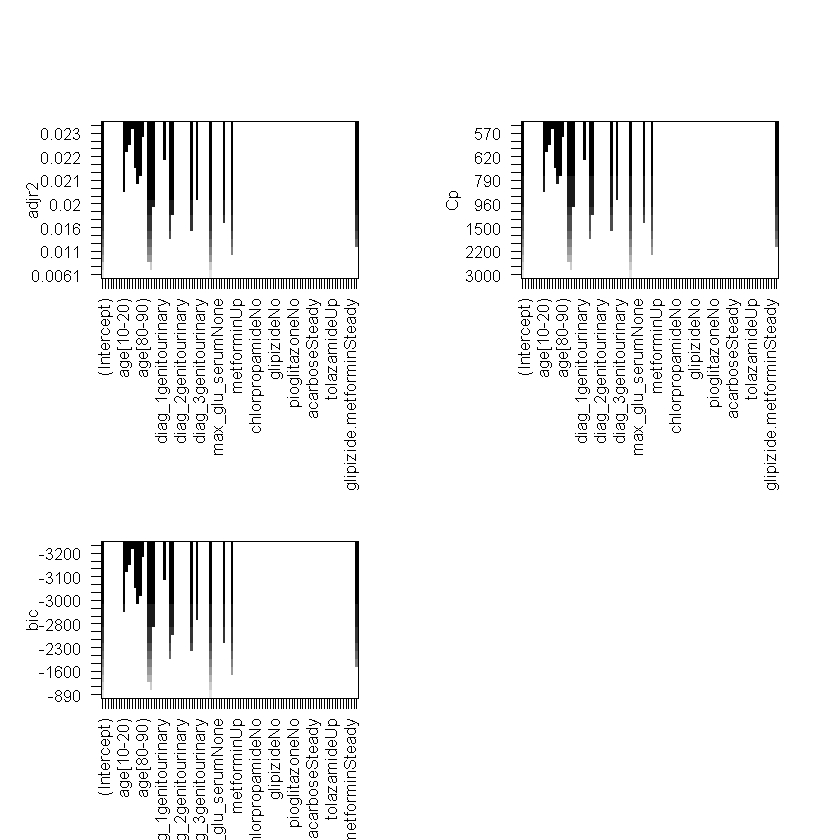

In [ ]:
par(mfrow =c(2,2))
plot(regfit.bwd ,scale ="adjr2")
plot(regfit.bwd ,scale ="Cp")
plot(regfit.bwd,scale ="bic")

In [ ]:
print(which.max(bwd.sum$adjr2))
print(which.min(bwd.sum$cp))
print(which.min(bwd.sum$bic))

[1] 20
[1] 20
[1] 20


In [ ]:
max(bwd.sum$adjr2)

[1] 0.022946

it is still very low, let's try a different way of  finding the best features

### Lasso Regression

In [ ]:
library(glmnet)

Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand

Loading required package: foreach

Attaching package: 'foreach'

The following objects are masked from 'package:purrr':

    accumulate, when

Loaded glmnet 2.0-16


Attaching package: 'glmnet'

The following object is masked from 'package:pROC':

    auc



### oversampled data
The following is divided into two sections:
* First we will use lasso to create a model and check the accuracy on the testing data
* We compare the model to the full logistic regression model using all the variables

### Lasso Model

In [ ]:
#define predictor and response variables
x <- model.matrix(readmitted∼.,over)[,-1]
y <- over$readmitted

Lasso Model using <strong>lambda.min</strong>

95 x 1 sparse Matrix of class "dgCMatrix"
                                         s0
(Intercept)                    -0.744395406
raceAsian                      -0.028077162
raceCaucasian                  -0.015968387
raceHispanic                   -0.029517586
raceOther                      -0.103310040
genderMale                      0.008867625
genderUnknown/Invalid          -1.317937944
age[10-20)                     -0.575384156
age[20-30)                      0.241704748
age[30-40)                      0.009278934
age[40-50)                     -0.058513679
age[50-60)                     -0.143037755
age[60-70)                      0.024941240
age[70-80)                      0.072373915
age[80-90)                      0.072383819
age[90-100)                     0.005701025
num_lab_procedures              0.034936040
num_procedures                 -0.102459516
num_medications                 0.117354495
diag_1diabetes                  0.191156412
diag_1digestive                -0.

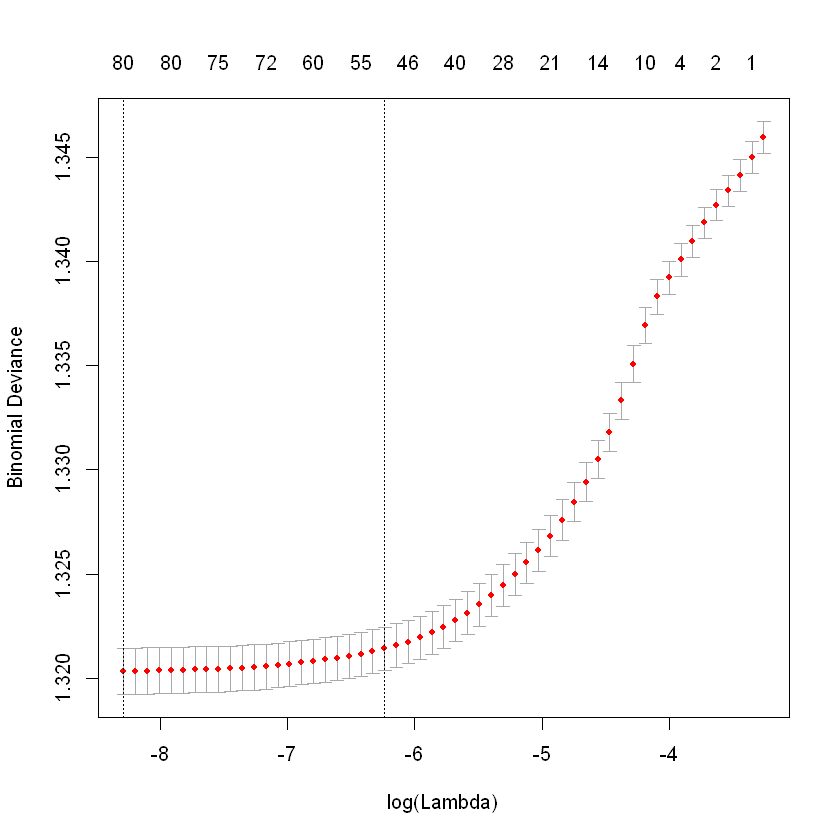

In [ ]:
# Find the best lambda using cross-validation
set.seed(123) 
cv.lasso <- cv.glmnet(x, y, alpha = 1, family = "binomial")
plot(cv.lasso)
# Fit the final model on the training data
model <- glmnet(x, y, alpha = 1, family = "binomial",
                lambda = cv.lasso$lambda.min)
# Display regression coefficients
coef(model)
# Make predictions on the test data
x.test <- model.matrix(readmitted ~., test)[,-1]
probabilities <- model %>% predict(newx = x.test)
predicted.classes <- as.factor(ifelse(probabilities > 0.5, 1, 0))
# Model accuracy
observed.classes <- test$readmitted
acc <- mean(predicted.classes == observed.classes)

The plot displays the cross-validation error according to the log of lambda. The left dashed vertical line indicates that the log of the optimal value of lambda is very low, which is the one that minimizes the prediction error. This lambda value will give the most accurate model. The exact value of lambda is

In [ ]:
cv.lasso$lambda.min

[1] 0.0002528717

In [ ]:
coef(cv.lasso, cv.lasso$lambda.min)

95 x 1 sparse Matrix of class "dgCMatrix"
                                          1
(Intercept)                    -0.759714029
raceAsian                      -0.027981753
raceCaucasian                  -0.015948793
raceHispanic                   -0.029418017
raceOther                      -0.103212909
genderMale                      0.008820195
genderUnknown/Invalid          -1.318130650
age[10-20)                     -0.579950406
age[20-30)                      0.237165613
age[30-40)                      0.004743910
age[40-50)                     -0.063176001
age[50-60)                     -0.147712441
age[60-70)                      0.020268584
age[70-80)                      0.067694407
age[80-90)                      0.067713601
age[90-100)                     0.001018535
num_lab_procedures              0.034952277
num_procedures                 -0.102492419
num_medications                 0.117389709
diag_1diabetes                  0.190669853
diag_1digestive                -0.

In [ ]:
#the predictors that were eliminated 
CFmin <- as.matrix(coef(cv.lasso, cv.lasso$lambda.min))
CFmin[abs(CFmin)==0,]

diag_3injury         max_glu_serumNorm               metforminNo 
                        0                         0                         0 
            repaglinideNo         nateglinideSteady      chlorpropamideSteady 
                        0                         0                         0 
            glimepirideNo               glyburideUp            pioglitazoneNo 
                        0                         0                         0 
           pioglitazoneUp       rosiglitazoneSteady                acarboseNo 
                        0                         0                         0 
               acarboseUp glyburide.metforminSteady 
                        0                         0

In [ ]:
acc

[1] 0.8864342

The accuracy we got from the lasso model is pretty high of 88.64%

Lasso model using <strong>lambda.1se</strong>

95 x 1 sparse Matrix of class "dgCMatrix"
                                         s0
(Intercept)                    -1.074503701
raceAsian                       .          
raceCaucasian                   .          
raceHispanic                    .          
raceOther                      -0.030083529
genderMale                      .          
genderUnknown/Invalid           .          
age[10-20)                     -0.463479554
age[20-30)                      0.193976311
age[30-40)                      .          
age[40-50)                     -0.055575090
age[50-60)                     -0.151678692
age[60-70)                      .          
age[70-80)                      0.031085455
age[80-90)                      0.029614985
age[90-100)                     .          
num_lab_procedures              0.028401003
num_procedures                 -0.088264750
num_medications                 0.108149321
diag_1diabetes                  0.198582251
diag_1digestive                -0.

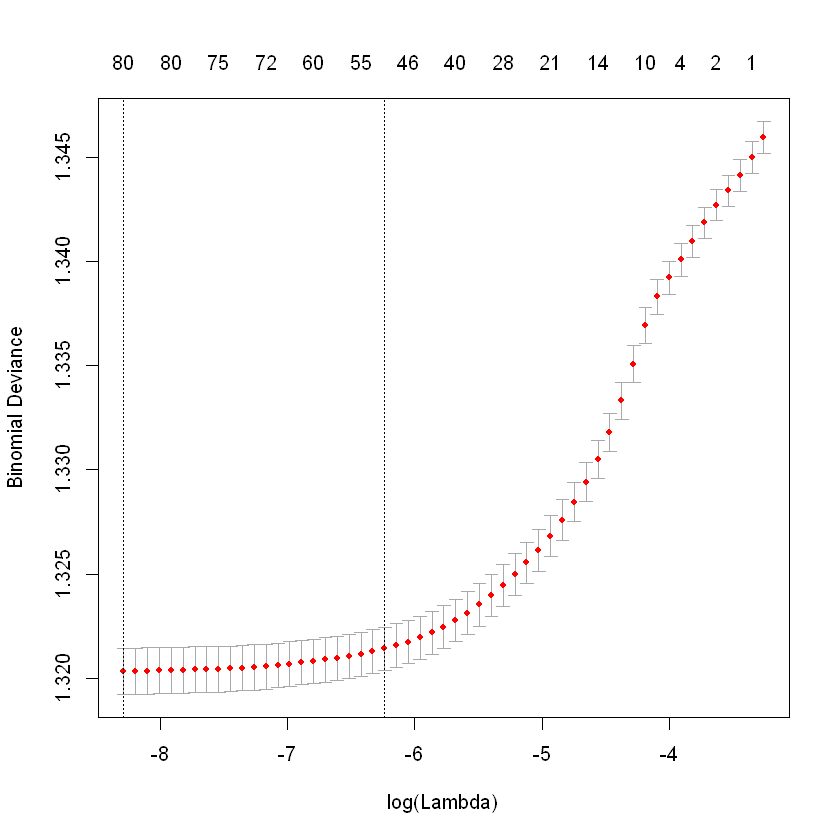

In [ ]:
# Find the best lambda using cross-validation
set.seed(123) 
cv.lasso <- cv.glmnet(x, y, alpha = 1, family = "binomial")
plot(cv.lasso)
# Fit the final model on the training data
model <- glmnet(x, y, alpha = 1, family = "binomial",
                lambda = cv.lasso$lambda.1se)
# Display regression coefficients
coef(model)
# Make predictions on the test data
x.test <- model.matrix(readmitted ~., test)[,-1]
probabilities <- model %>% predict(newx = x.test)
predicted.classes <- as.factor(ifelse(probabilities > 0.5, 1, 0))
# Model accuracy
observed.classes <- test$readmitted
acc <- mean(predicted.classes == observed.classes)

The function cv.glmnet() finds the value of lambda that gives the simplest model but also lies within one standard error of the optimal value of lambda. This value is called lambda.1se, which is:

In [ ]:
cv.lasso$lambda.1se

[1] 0.001957894

In [ ]:
coef(cv.lasso, cv.lasso$lambda.1se)

95 x 1 sparse Matrix of class "dgCMatrix"
                                          1
(Intercept)                    -1.088342403
raceAsian                       .          
raceCaucasian                   .          
raceHispanic                    .          
raceOther                      -0.030149588
genderMale                      .          
genderUnknown/Invalid           .          
age[10-20)                     -0.463563546
age[20-30)                      0.193909625
age[30-40)                      .          
age[40-50)                     -0.055566173
age[50-60)                     -0.151674676
age[60-70)                      .          
age[70-80)                      0.031044726
age[80-90)                      0.029568065
age[90-100)                     .          
num_lab_procedures              0.028393640
num_procedures                 -0.088292575
num_medications                 0.108165731
diag_1diabetes                  0.198512602
diag_1digestive                -0.

Let's check the accuracy of the model on the test data

In [ ]:
acc

[1] 0.8873489

In [ ]:
#the predictors that were eliminated 
CF <- as.matrix(coef(cv.lasso, cv.lasso$lambda.1se))
CF[abs(CF)==0,]

raceAsian                  raceCaucasian 
                             0                              0 
                  raceHispanic                     genderMale 
                             0                              0 
         genderUnknown/Invalid                     age[30-40) 
                             0                              0 
                    age[60-70)                    age[90-100) 
                             0                              0 
                   diag_1other                diag_2digestive 
                             0                              0 
           diag_2genitourinary                   diag_2injury 
                             0                              0 
                  diag_3injury          diag_3musculoskeletal 
                             0                              0 
             max_glu_serumNorm                  A1CresultNorm 
                             0                              0 
                 repaglinideNo                  repaglinideUp 
                             0                              0 
                 nateglinideNo              nateglinideSteady 
                             0                              0 
          chlorpropamideSteady                  glimepirideNo 
                             0                              0 
           acetohexamideSteady                    glipizideNo 
                             0                              0 
               glyburideSteady                    glyburideUp 
                             0                              0 
                pioglitazoneNo                 pioglitazoneUp 
                             0                              0 
           rosiglitazoneSteady                rosiglitazoneUp 
                             0                              0 
                    acarboseNo                     acarboseUp 
                             0                              0 
                    miglitolNo                     miglitolUp 
                             0                              0 
              tolazamideSteady                   tolazamideUp 
                             0                              0 
                     insulinUp      glyburide.metforminSteady 
                             0                              0 
     glipizide.metforminSteady glimepiride.pioglitazoneSteady 
                             0                              0 
  metformin.pioglitazoneSteady 
                             0

We notice that even if the model with lmbda.1se eliminates more predictors than the one with lamba.min, the accuracy only improved by 0.001.

### Full model using all predictors

In [ ]:
# Fit the model of logistic regression
full.model <- glm(readmitted ~., data = over, family = "binomial")
# Make predictions
probabilities <- full.model %>% predict(test, type = "response")
predicted.classes <- as.factor(ifelse(probabilities > 0.5, 1, 0))
# Model accuracy
observed.classes <- test$readmitted
acc <- mean(predicted.classes == observed.classes)

In [ ]:
coef(full.model)

(Intercept)                      raceAsian 
                 -23.040403107                   -0.044739255 
                 raceCaucasian                   raceHispanic 
                  -0.020362193                   -0.042104746 
                     raceOther                     genderMale 
                  -0.116497347                    0.012027056 
         genderUnknown/Invalid                     age[10-20) 
                 -10.633380626                    0.900242931 
                    age[20-30)                     age[30-40) 
                   1.747654331                    1.519038565 
                    age[40-50)                     age[50-60) 
                   1.445547339                    1.364161044 
                    age[60-70)                     age[70-80) 
                   1.538136108                    1.586136556 
                    age[80-90)                    age[90-100) 
                   1.586732844                    1.525009362 
            num_lab_procedures                 num_procedures 
                   0.035851470                   -0.104589723 
               num_medications                 diag_1diabetes 
                   0.117919882                    0.198510914 
               diag_1digestive            diag_1genitourinary 
                  -0.162401346                   -0.161987553 
                  diag_1injury          diag_1musculoskeletal 
                   0.020865618                   -0.179433335 
                   diag_1other              diag_1respiratory 
                  -0.054335629                   -0.259938025 
                diag_2diabetes                diag_2digestive 
                   0.316654288                    0.044422921 
           diag_2genitourinary                   diag_2injury 
                  -0.008651976                    0.022010809 
         diag_2musculoskeletal                    diag_2other 
                  -0.083314421                    0.038973495 
             diag_2respiratory                 diag_3diabetes 
                  -0.062893974                    0.371355145 
               diag_3digestive            diag_3genitourinary 
                   0.129119006                    0.169062462 
                  diag_3injury          diag_3musculoskeletal 
                   0.004070792                    0.021448778 
                   diag_3other              diag_3respiratory 
                  -0.004213503                    0.090919946 
              number_diagnoses              max_glu_serum>300 
                   0.124431612                    0.103216389 
             max_glu_serumNone              max_glu_serumNorm 
                  -0.103493537                   -0.010647508 
                   A1Cresult>8                  A1CresultNone 
                  -0.038830150                    0.215529384 
                 A1CresultNorm                    metforminNo 
                  -0.019334495                   -0.066329041 
               metforminSteady                    metforminUp 
                  -0.265699512                   -0.341869554 
                 repaglinideNo              repaglinideSteady 
                   0.768749253                    0.829547876 
                 repaglinideUp                  nateglinideNo 
                   0.975955471                   -0.286086331 
             nateglinideSteady                  nateglinideUp 
                  -0.223247042                   -1.466214134 
              chlorpropamideNo           chlorpropamideSteady 
                  11.072465127                   10.521286219 
              chlorpropamideUp                  glimepirideNo 
                  -0.207617101                   -0.178232441 
             glimepirideSteady                  glimepirideUp 
                  -0.352835510                   -0.337609587 
           acetohexamideSteady                    glipizideNo 
                 -11.208028417                   -

In [ ]:
acc

[1] 0.8239273

In [ ]:
roc_logreg = roc(response = test$readmitted,
                 predictor = probabilities) 

We have a test acccuracy of 82.77% which is a really good accuracy

In [ ]:
cff <- as.matrix(coef(full.model))
#coef shrinked to 0 by lasso lambda.1se
length(CF[abs(CF)==0,])
#coef shrinked to 0 by lasso lambda.min
length(CFmin[abs(CFmin)==0,])
#coef shrinked to 0 by linear rgression
length(cff[abs(cff)==0,])

[1] 41

[1] 14

[1] 0

We notice that the logistic regression model did not eliminate any models, whereas the one where we eliminated some predictors by shrinking their coef to 0 perfermoed better.

The full model gave less accuracy because the lasso picked the best training set during the cross-validation

##### Lasso vs Full model
We notice that the lasso model performed better than the full model, and since we did not eliminate any predictors.

# Linear Descriminant Analysis (LDA)
In this section, we will use LDA to train our model using cross-validation.

Since the lda() function only has cross-val attribute for leave-one-out and our dataset is huge, we will hard-code the folds and feed them to our model using a for-loop.

In [ ]:
#importing the MASS package to use LDA
library(MASS)


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select



In [ ]:
#creating folds from our dataset "over"
#we will use k-Folds cross-validation
folds <- split(over, rep(1:10, nrow(over) / 10))
train_fold <- as.data.frame(matrix(nrow = 0,ncol=ncol(over)))
colnames(train_fold) <- colnames(over)

#saving the models and the accuracy
lda.models.cv <- vector(length=3)
va.acc <- vector(length=3)


Warning message in split.default(x = seq_len(nrow(x)), f = f, drop = drop, ...):
"data length is not a multiple of split variable"

In [ ]:
#combining the 9 parts into training and storing the validation test as "dev"
for(i in (1:10)){
  dev= folds[[i]]
  for(j in (1:10)){
    if(j != i){
      train_fold = rbind(train_fold,folds[[j]])
    }
  }
  #fitting the model
  lda.mod <- lda(readmitted ~., data=train_fold)
  #predicting on the validation set
  m_pred <- predict(lda.mod, dev)$class
  #storing the validation accuracy
  val.acc.k <- mean(m_pred == train_fold$readmitted)
}
ldamod <- lda(readmitted ~., data=over)


ERROR: Error in lda.default(x, grouping, ...): variable 84 appears to be constant within groups


After hours and hours of work and research and reading papers, we found out that this error, aka variable Constant across samples (called zero variance predictors) happens for many reasons, one reason is because we usually break a categorical variable with many categories into several dummy variables. Hence, when one of the categories have zero observations, it becomes a dummy variable full of zeroes. 

In this case, it's dummy variable number 84.

Since we are using all predictors, we check which one is number 84 from cff.

In [ ]:
cff[84,]

tolazamideSteady 
       0.1584626

One way to handle this is to remove the predictor to avoid this error.

We decided to remove it from the data and not just the formula of the prediction because why not we are tired.

In [ ]:
over <- dplyr::select(over, -tolazamide)

In [ ]:
#creating folds from our dataset "over"
#we will use k-Folds cross-validation
folds <- split(over, rep(1:10, nrow(over) / 10))
train_fold <- as.data.frame(matrix(nrow = 0,ncol=ncol(over)))
colnames(train_fold) <- colnames(over)

#saving the models and the accuracy
lda.models.cv <- vector(length=3)
va.acc.k <- vector(length=3)
best.acc <-0
best.k <- 0


#combining the 9 parts into training and storing the validation test as "dev"
for(i in (1:10)){
    dev= folds[[i]]
    for(j in (1:10)){
    if(j != i){
      train_fold = rbind(train_fold,folds[[j]])
    }
      }
    #fitting the model
    lda.mod <- lda(readmitted ~., data=train_fold)
    #predicting on the validation set
    m_pred <- predict(lda.mod, dev)$class
    #storing the validation accuracy
    val.acc <- mean(m_pred == train_fold$readmitted)
    if(as.double(format(round(val.acc, 3), nsmall = 3)) > best.acc){
        best.k <- i
        best.mod <- lda.mod
        best.acc <- val.acc
    }
    val.acc.k[i] <- val.acc
}

Warning message in split.default(x = seq_len(nrow(x)), f = f, drop = drop, ...):
"data length is not a multiple of split variable"Warning message in `==.default`(m_pred, train_fold$readmitted):
"longer object length is not a multiple of shorter object length"Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"Warning message in `==.default`(m_pred, train_fold$readmitted):
"longer object length is not a multiple of shorter object length"Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"Warning message in `==.default`(m_pred, train_fold$readmitted):
"longer object length is not a multiple of shorter object length"Warning message in is.na(e1) | is.na(e2):
"longer object length is not a multiple of shorter object length"Warning message in `==.default`(m_pred, train_fold$readmitted):
"longer object length is not a multiple of shorter object length"Warning message in is.na(e1) | is

Let's check which fold gave us the best accuracy

In [ ]:
best.k

[1] 4

Let's check because we have trust issues

In [ ]:
which(val.acc.k == max(val.acc.k))

[1] 4

Let's look at our BEAUTIFUL model

In [ ]:
best.mod

Call:
lda(readmitted ~ ., data = train_fold)

Prior probabilities of groups:
       0        1 
0.599583 0.400417 

Group means:
    raceAsian raceCaucasian raceHispanic  raceOther genderMale
0 0.006520993     0.7644071   0.02074003 0.01543071  0.4619897
1 0.005937878     0.7697988   0.01855351 0.01333195  0.4578104
  genderUnknown/Invalid  age[10-20) age[20-30) age[30-40) age[40-50) age[50-60)
0          1.258879e-05 0.007323529 0.01570452 0.03701734 0.09569054  0.1725357
1          0.000000e+00 0.003572152 0.02201256 0.03756415 0.08871473  0.1453366
  age[60-70) age[70-80) age[80-90) age[90-100) num_lab_procedures
0  0.2211756  0.2540040  0.1673554  0.02740580        -0.02840940
1  0.2232124  0.2698342  0.1816849  0.02776194         0.04303052
  num_procedures num_medications diag_1diabetes diag_1digestive
0      0.0156835     -0.05056530     0.08183658      0.03426039
1     -0.0251662      0.07504009     0.09879499      0.03082042
  diag_1genitourinary diag_1injury diag_1musculoskel

Let's use it to predict on the test set

In [ ]:
pred <- predict(best.mod, newdata = test)$class
test.acc <- mean(pred == test$readmitted)

Let's look at our accuracy

In [ ]:
test.acc

[1] 0.8227011

Yay! we acheived an accuracy of 82.27%

In [ ]:
library(e1071)
lda.cm <- confusionMatrix(data = pred, reference=test$readmitted)


Attaching package: 'e1071'

The following object is masked from 'package:Hmisc':

    impute



In [ ]:
lda.cm

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 80194  9510
         1  8130  1659
                                          
               Accuracy : 0.8227          
                 95% CI : (0.8203, 0.8251)
    No Information Rate : 0.8877          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0597          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.9080          
            Specificity : 0.1485          
         Pos Pred Value : 0.8940          
         Neg Pred Value : 0.1695          
             Prevalence : 0.8877          
         Detection Rate : 0.8060          
   Detection Prevalence : 0.9016          
      Balanced Accuracy : 0.5282          
                                          
       'Positive' Class : 0               
                  

Even though we have a high accuracy, we notice that we only correctly classify 20% of positive cases, that is because we used ROSE for our oversampling.Which is  a bootstrap-based technique. It handles both continuous and categorical data by <strong>generating synthetic examples from a conditional density estimate of the two classes </strong>

Hence, our model did not learn much about the positive cases from our data.

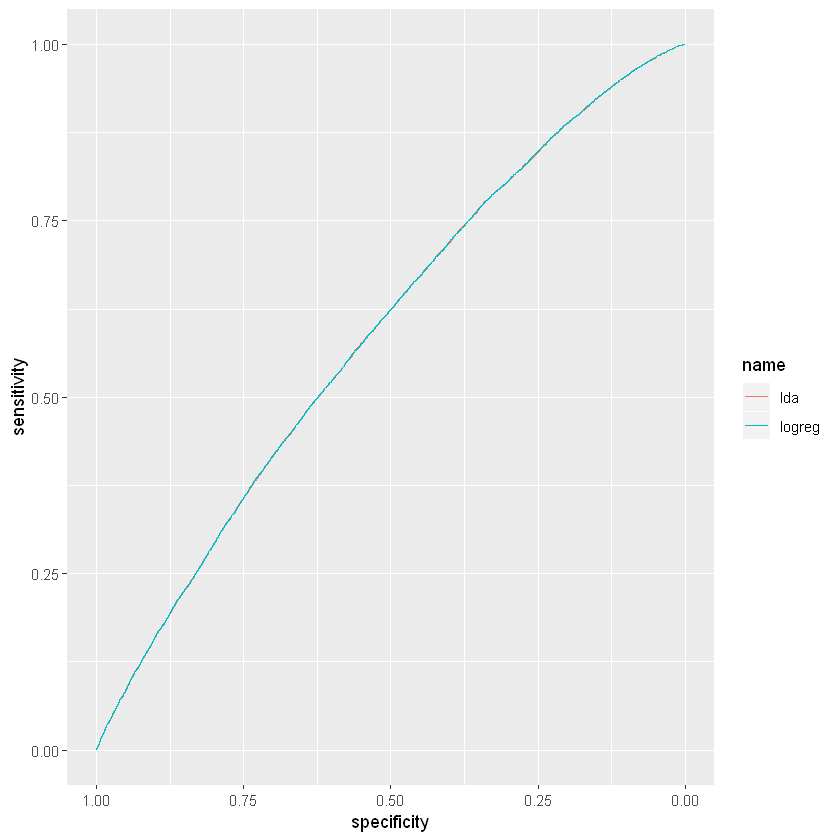

In [ ]:
lda_pred <- predict(best.mod, newdata = test)
roc_lda <- roc(response = test$readmitted,
              predictor = lda_pred$posterior[,2])
ggroc(list(lda = roc_lda,
          logreg = roc_logreg))

Teh shape does not spark joy, we can see that the curve is not to the top-left corner, but almost forms the line y=x, which means our auc is approx 0.5.

This is a good measure to estimate the actual performance of our models.

Even if we have a high accuracy of 82%, our model performs poorly on positive cases, which can be seen on the ROC curve.

## Quadratic Discriminant Analysis - QDA

In [ ]:
#saving the models and the accuracy
val.acc.k <- vector(length=3)
best.acc.q <-0
best.k.q <- 0

train_fold <- as.data.frame(matrix(nrow = 0,ncol=ncol(over)))
colnames(train_fold) <- colnames(over)

#combining the 9 parts into training and storing the validation test as "dev"
for(i in (1:10)){
    dev= folds[[i]]
    for(j in (1:10)){
    if(j != i){
      train_fold = rbind(train_fold,folds[[j]])
    }
      }
    #fitting the model
    qda.mod <- qda(readmitted ~., data=train_fold)
    #predicting on the validation set
    m_pred <- predict(qda.mod, dev)$class
    #storing the validation accuracy
    val.acc <- mean(m_pred == train_fold$readmitted)
    if(as.double(format(round(val.acc, 3), nsmall = 3)) > best.acc.q){
        best.k.q <- i
        best.mod.q <- qda.mod
        best.acc.q <- val.acc
    }
    val.acc.k[i] <- val.acc
}

ERROR: Error in qda.default(x, grouping, ...): rank deficiency in group 1


We see that we have rank deficiency in group1.

This error occurs for many reasons, one of the reasons is when we have collinearity in the data. Which does not apply in our case because we already took care of this problem at the beginning an removed the correlated features.

Rank deficiency in this context says there is insufficient information contained in our data to estimate the model we desire. For example, if we have only two points in a graph, we cannot determine a quadratic relationship, evem if we duplicate these points zillions of times, it is still not enough.

Which is what we did in our oversampling. Deficiency in rank 1 means we do not have enough information about class 1 to determine a quadratic model, which is the model we had too little data about.

# Conclusion and Feature Work Suggestions

Knowing that logistic regression and LDA perfomed well on our dataset, we can say that our data is linearly sparable since QDA needed more information to fit our model.

For future work, we suggest using undersampling in a way where we keep all levels of predictors in the remaining observations, or using a bigger dataset than the one we have. Using mor complex models like ANN could also help us classify more accuratly, however, by sacrificing the interpretability of our model. Or we can use Decision Trees if we can more about interpretability than accuracy.